In [1]:
import pandas as pd # importing the librarires
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("D:\\Excel\\predictive_maintenance.csv") # importing the csv file

In [3]:
data.head() # displaying the first five records

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0


In [4]:
data.shape # number of rows and columns present in the data set

(10000, 9)

In [5]:
data.columns # displaying the columns present in the data set

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target'],
      dtype='object')

In [6]:
data.duplicated().sum() # checking for the duplicates

0

In [7]:
data.info() # types of variables present in the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.2+ KB


In [8]:
data.isnull().sum() # checking for null values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
dtype: int64

In [9]:
data.nunique() # checking for unique elements present in the data

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
dtype: int64

In [10]:
data.drop(columns =['UDI','Product ID'], inplace= True) # dropping the columns which are irrelevant

In [11]:
data.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')

In [12]:
#renaming the columns properly

data.rename(columns={'Air temperature [K]': 'Air_temperature','Process temperature [K]':'Process_temperature',
                     'Rotational speed [rpm]':'Rotational_speed','Torque [Nm]': 'Torque','Tool wear [min]':'Tool_wear'}
            , inplace=True)

In [13]:
data.columns # checking column names after renaming

Index(['Type', 'Air_temperature', 'Process_temperature', 'Rotational_speed',
       'Torque', 'Tool_wear', 'Target'],
      dtype='object')

In [14]:
num_columns = [fea for fea in data.columns if data[fea].dtypes != 'object'] # seperating numerical columns from the data
num_columns

['Air_temperature',
 'Process_temperature',
 'Rotational_speed',
 'Torque',
 'Tool_wear',
 'Target']

In [15]:
num_data = data[num_columns] # creating numerical data frame
num_data.head(3)

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0


In [16]:
num_data.describe() # displaying the descriptive stats

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [17]:
num_data.corr() # correlation of variables with the target variables

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target
Air_temperature,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process_temperature,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational_speed,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool_wear,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


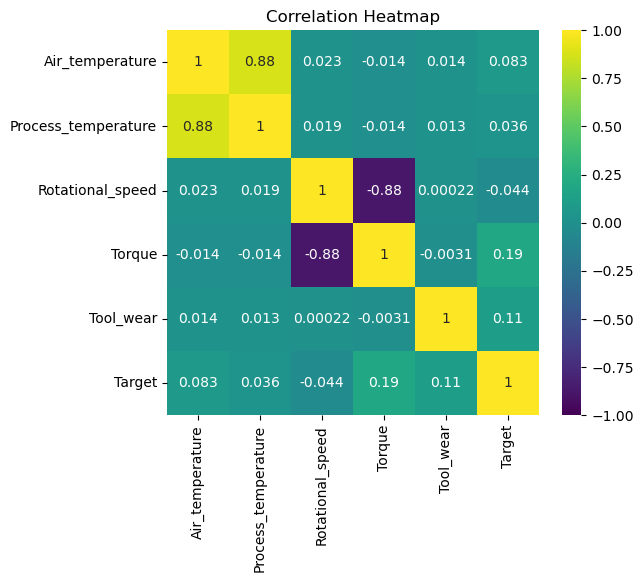

In [18]:
plt.figure(figsize=(6, 5))            # visulizing the corelation with heat map
sns.heatmap(num_data.corr(), annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
num_data['Target'].value_counts() # clearly it has a class imbalance problem which needs to be taken care of

0    9661
1     339
Name: Target, dtype: int64

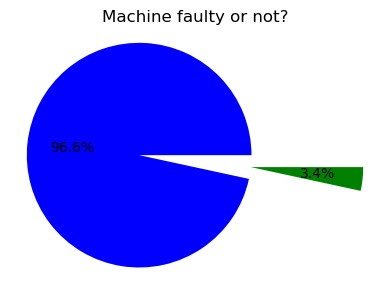

In [20]:
maintannce_y_or_n =num_data['Target'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4,3))
plt.pie(maintannce_y_or_n , maintannce_y_or_n .index, autopct='%1.1f%%',  colors=['blue', 'green'])
plt.title('Machine faulty or not?')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

<Axes: >

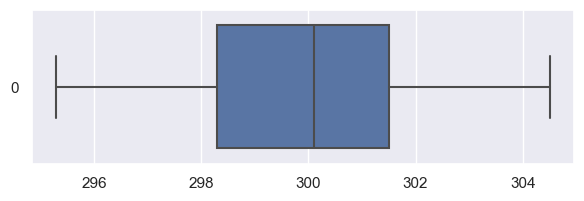

In [21]:
sns.set(rc={'figure.figsize':(7,2)}) # checking for outliers in air temperature column
sns.boxplot(num_data['Air_temperature'], orient="h") 

<Axes: xlabel='Air_temperature', ylabel='Density'>

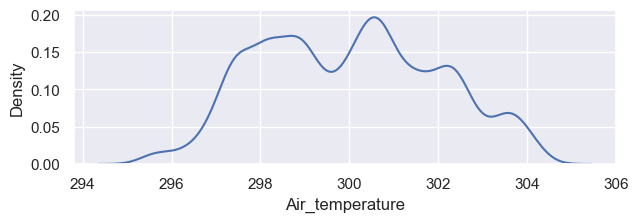

In [22]:
sns.kdeplot(num_data['Air_temperature']) # checking for skewness in the air temperature column

<Axes: >

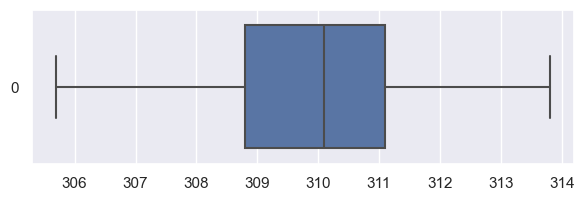

In [23]:
sns.set(rc={'figure.figsize':(7,2)}) # checking for outliers in the process temperature  column
sns.boxplot(num_data['Process_temperature'],orient= 'h')

<Axes: xlabel='Process_temperature', ylabel='Density'>

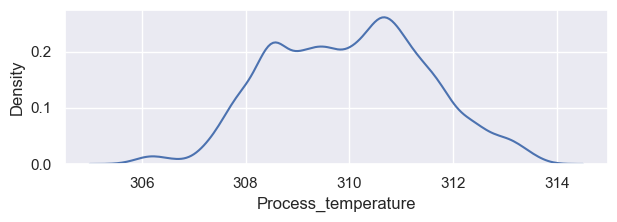

In [24]:
sns.kdeplot(num_data['Process_temperature']) #checking for skewness in the process temperature column

<Axes: >

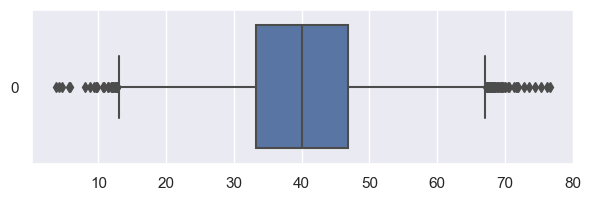

In [25]:
sns.set(rc={'figure.figsize':(7,2)}) # checking for outliers in the torque column
sns.boxplot(num_data['Torque'],orient= 'h')

In [26]:
Q1 = num_data['Torque'].quantile(0.25)
Q3 = num_data['Torque'].quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

12.800000000000011
67.19999999999999


In [27]:
median_value = num_data['Torque'].median() # finding out the median for the torque column
median_value

40.1

In [28]:
# Replace outliers with the median value
num_data['Torque'] = num_data['Torque'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

<Axes: >

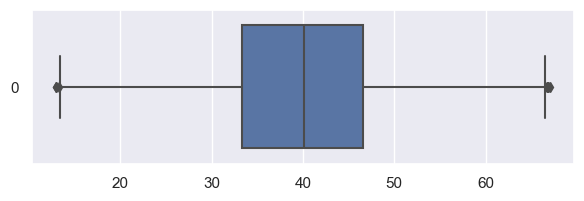

In [29]:
sns.set(rc={'figure.figsize':(7,2)}) # checking for outliers in the torque column after treating the outliers
sns.boxplot(num_data['Torque'],orient= 'h')

<Axes: xlabel='Torque', ylabel='Density'>

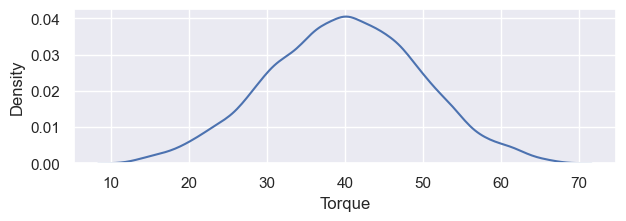

In [30]:
sns.kdeplot(num_data['Torque']) # checking for skewness in the torque column

<Axes: >

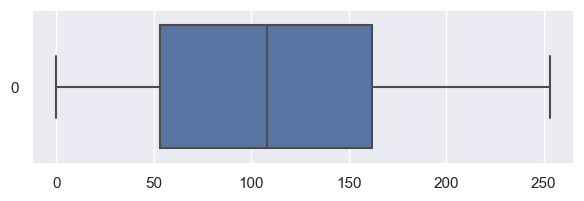

In [31]:
sns.set(rc={'figure.figsize':(7,2)}) # checking for outliers in the tool wear
sns.boxplot(num_data['Tool_wear'],orient= 'h')

<Axes: xlabel='Tool_wear', ylabel='Density'>

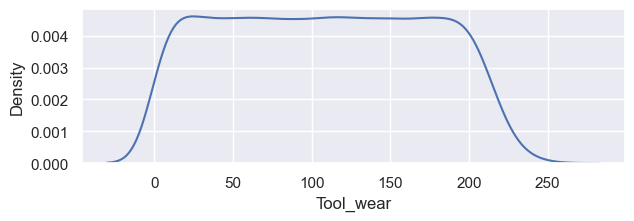

In [32]:
sns.kdeplot(num_data['Tool_wear']) # checkinf for skewness in the tool wear column

<Axes: >

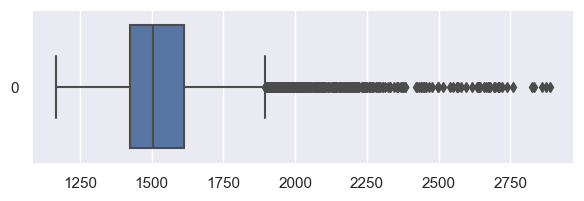

In [33]:
sns.set(rc={'figure.figsize':(7,2)}) # checking for outliers in the rpm column
sns.boxplot(num_data['Rotational_speed'],orient= 'h')

In [34]:
Q1 = num_data['Rotational_speed'].quantile(0.25)
Q3 = num_data['Rotational_speed'].quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

1139.5
1895.5


In [35]:
import numpy as np # applying logarithmic transformation to reduce outliers impact since data was right skewed
num_data['Rotational_speed'] = np.log1p(num_data['Rotational_speed'])

<Axes: xlabel='Rotational_speed', ylabel='Density'>

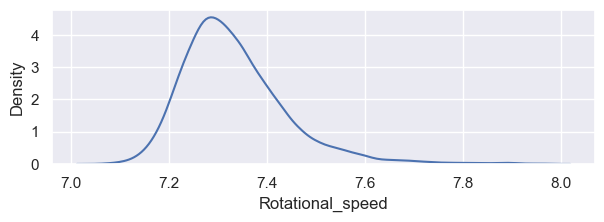

In [36]:
sns.kdeplot(num_data['Rotational_speed'])

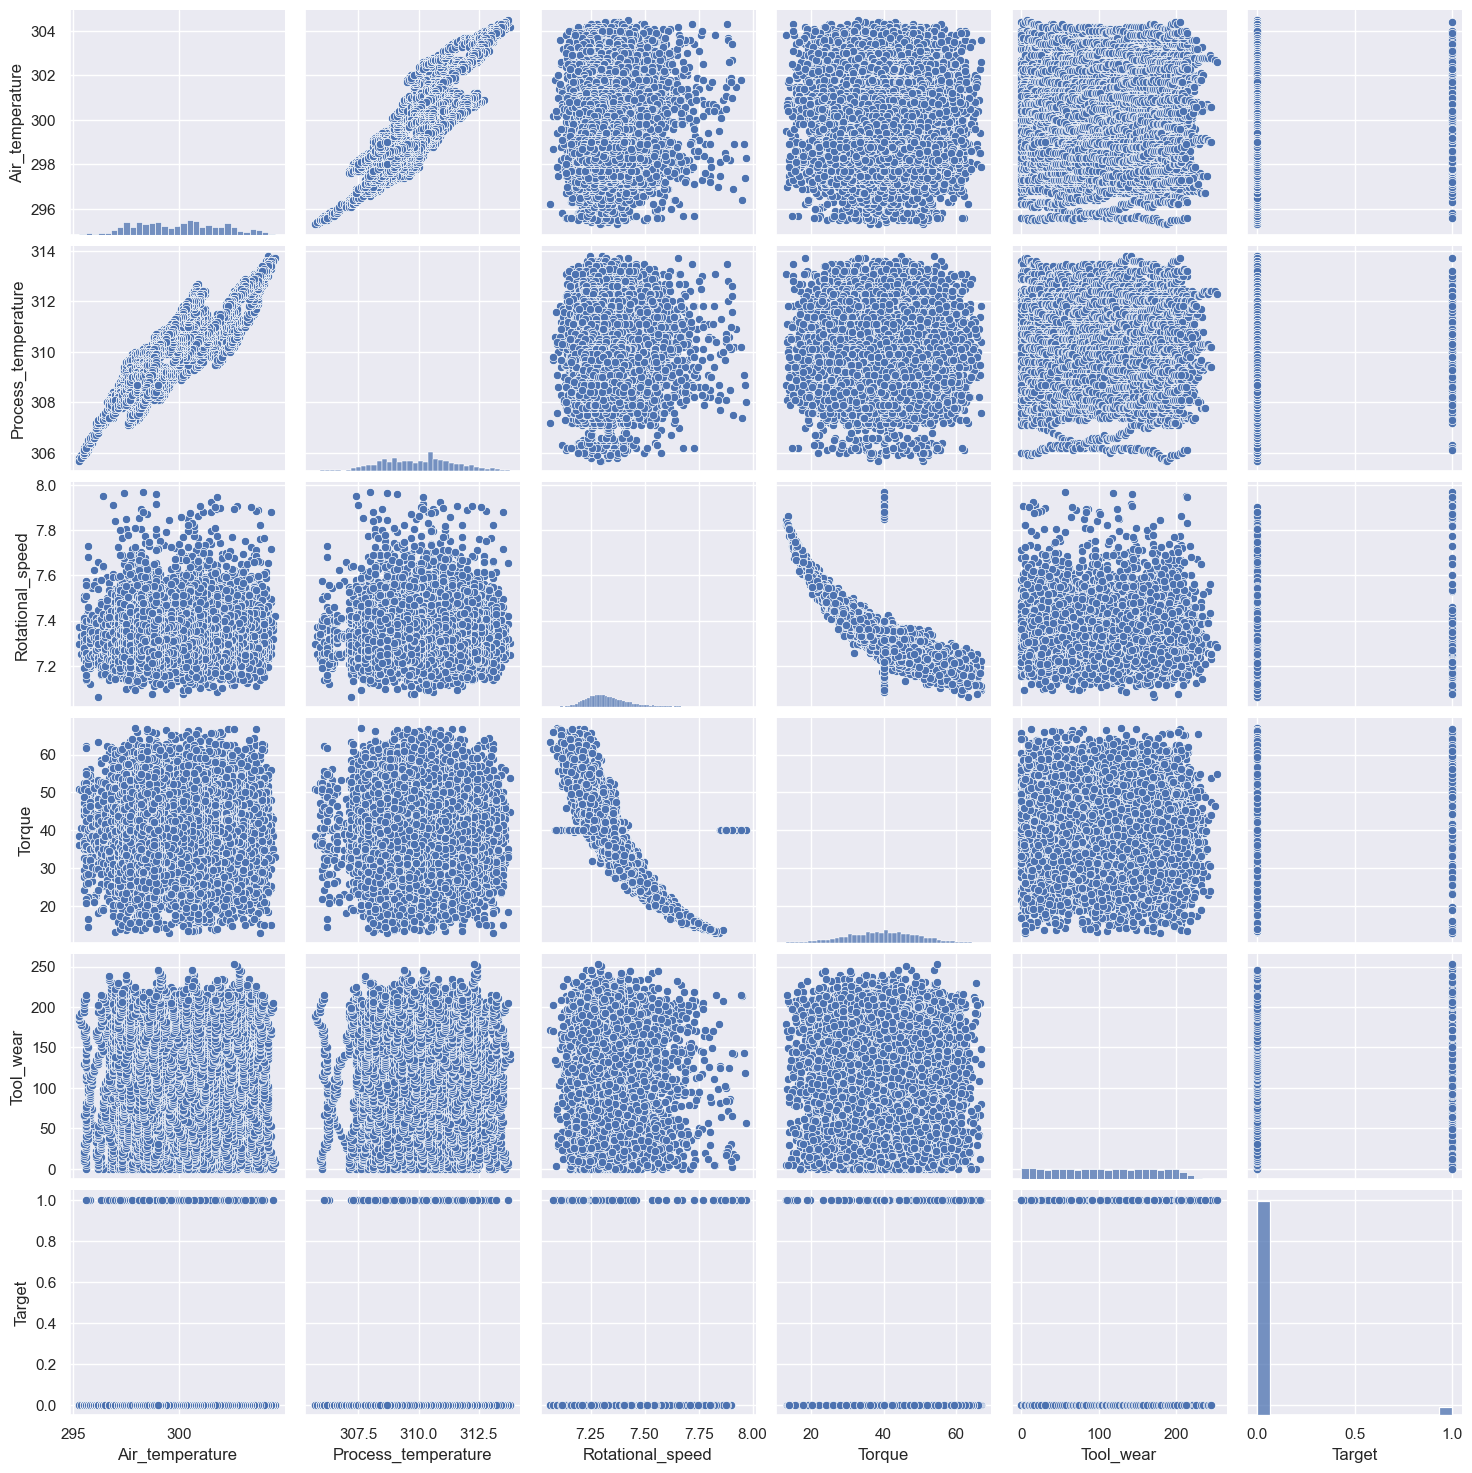

In [37]:
sns.pairplot(data = num_data) # visualizing relationship of variables using pair plot

In [38]:
cat_columns = [fea for fea in data.columns if data[fea].dtypes == 'object']
cat_columns

['Type']

In [39]:
cat_data = data[cat_columns] #  creating categorical data frame

In [40]:
cat_data['Type'].value_counts() # display the total count of types of machine failure

L    6000
M    2997
H    1003
Name: Type, dtype: int64

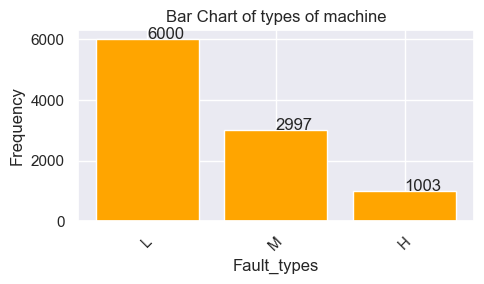

In [41]:
# Visulaizing the total count of types of machine failure occured using bar chart
plt.figure(figsize=(5,3))
plt.bar(cat_data['Type'].value_counts().index,
        cat_data['Type'].value_counts().values,
        color='orange')

plt.title('Bar Chart of types of machine')
plt.xlabel('Fault_types')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels

for x,y in zip(cat_data['Type'].value_counts().index,
        cat_data['Type'].value_counts().values):
    plt.text(x,y,y) #(x,y) --> Coordinate system , y--> str text (y)
plt.show()

In [42]:
label_encoder = LabelEncoder() # using label encoder to convert categoriacal data into numerical

# Fit and transform the 'Category' column
cat_data['Type'] = label_encoder.fit_transform(cat_data['Type'])

In [43]:
cat_data['Type'].head(3) # checking the first 3 rows after converting

0    2
1    1
2    1
Name: Type, dtype: int32

In [44]:
combined_data = pd.concat([num_data, cat_data], axis=1)

In [45]:
combined_data.head(5) # combining the categoriacal and numerical data

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Target,Type
0,298.1,308.6,7.347300,42.8,0,0,2
1,298.2,308.7,7.250636,46.3,3,0,1
2,298.1,308.5,7.312553,49.4,5,0,1
3,298.2,308.6,7.268223,39.5,7,0,1
4,298.2,308.7,7.250636,40.0,9,0,1


In [46]:
X = combined_data.drop(['Target'], axis = 1) # creating datsets 
y = combined_data['Target']

In [47]:
scaler =MinMaxScaler() # to convert the data in the sacle of 0-1
X_scaled = scaler.fit_transform(X)

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size= 0.3 , random_state= 42) # splitting the data into train test split

In [49]:
# Apply SMOTE for over-sampling the minority class
smote = SMOTE(random_state=8)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)# Apply SMOTE for over-sampling the minority class


# Logistic regression

In [50]:
from sklearn.metrics import accuracy_score #importing accuracy score from the library 
from sklearn.linear_model import LogisticRegression #importing Logistic Regression from the library
from sklearn import metrics

In [51]:
log_reg_model = LogisticRegression(random_state=8)
log_reg_model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=8)

In [52]:
# Training evaluation(Logistic Regression)
train_pred_log_reg = log_reg_model.predict(X_resampled)
train_acc_log_reg = accuracy_score(y_resampled, train_pred_log_reg)

In [53]:
#testing evaluation(Logistic Regression)
test_pred_log_reg = log_reg_model.predict(X_test)
test_acc_log_reg = accuracy_score(y_test, test_pred_log_reg)

In [54]:
print("Logistic Regression:")
print(f"Training Accuracy: {train_acc_log_reg:.4f}")
print(f"Testing Accuracy: {test_acc_log_reg:.4f}")
print("\nClassification Report (Testing Set):\n", classification_report(y_test, test_pred_log_reg))

Logistic Regression:
Training Accuracy: 0.7943
Testing Accuracy: 0.7917

Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.99      0.79      0.88      2907
           1       0.10      0.69      0.17        93

    accuracy                           0.79      3000
   macro avg       0.54      0.74      0.53      3000
weighted avg       0.96      0.79      0.86      3000



#  Decission Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier # importing Decission Tree from the library
dt_model = DecisionTreeClassifier(random_state=8)
dt_model.fit(X_resampled, y_resampled)

DecisionTreeClassifier(random_state=8)

In [56]:
# Training evaluation(Decission Tree)
train_pred_dt = dt_model.predict(X_resampled)
train_acc_dt = accuracy_score(y_resampled, train_pred_dt)

In [57]:
#testing evaluation(Decission Tree)
test_pred_dt = dt_model.predict(X_test)
test_acc_dt = accuracy_score(y_test, test_pred_dt)

In [58]:
print("\nDecision Tree:")
print(f"Training Accuracy: {train_acc_dt:.4f}")
print(f"Testing Accuracy: {test_acc_dt:.4f}")
print("\nClassification Report (Testing Set):\n", classification_report(y_test, test_pred_dt))


Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.9523

Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      2907
           1       0.36      0.71      0.48        93

    accuracy                           0.95      3000
   macro avg       0.68      0.83      0.73      3000
weighted avg       0.97      0.95      0.96      3000



#  Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier # importing Random Forest from the library
rf_model = RandomForestClassifier(random_state=42) # creating the random forest Model(not Tuned)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [60]:
# Training evaluation
train_pred_rf = rf_model.predict(X_resampled)
train_acc_rf = accuracy_score(y_resampled, train_pred_rf)

In [61]:
# testing evaluation
test_pred_rf = rf_model.predict(X_test)
test_acc_rf = accuracy_score(y_test, test_pred_rf)

In [62]:
print("\nRandom Forest:")
print(f"Training Accuracy: {train_acc_rf:.4f}")
print(f"Testing Accuracy: {test_acc_rf:.4f}")
print("\nClassification Report (Testing Set):\n", classification_report(y_test, test_pred_rf))


Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.9687

Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2907
           1       0.50      0.82      0.62        93

    accuracy                           0.97      3000
   macro avg       0.75      0.90      0.80      3000
weighted avg       0.98      0.97      0.97      3000



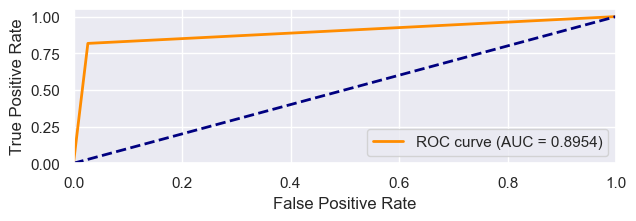

In [63]:
# plotting the roc_auc curve for the random forest algorithm(without tuning)
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred_rf)

# Calculate AUC
roc_auc = roc_auc_score(y_test, test_pred_rf)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()



### Hyper Parameter Tuning Using GridSearchCv

In [64]:
params = {
    'max_depth': [2,3,4,5],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [200, 400, 600]}

grid_search_CV = GridSearchCV(estimator=rf_model,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search_CV.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [200, 400, 600]},
             scoring='accuracy', verbose=1)

In [65]:
grid_search_CV.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 600}

In [66]:
# creating the tuned random forest model(GridSearchCv)
rf_model = RandomForestClassifier(n_estimators=200,max_depth=5,min_samples_leaf=5,n_jobs=-1,random_state=42)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [67]:
# Training evaluation(GridSearchCv)
train_pred_rf_gs = rf_model.predict(X_resampled)
train_acc_rf_gs = accuracy_score(y_resampled, train_pred_rf_gs)

In [68]:
# testing evaluation(GridSearchCv)
test_pred_rf_gs = rf_model.predict(X_test)
test_acc_rf_gs = accuracy_score(y_test, test_pred_rf_gs)

In [69]:
print("\nRandom Forest:")
print(f"Training Accuracy: {train_acc_rf_gs:.4f}")
print(f"Testing Accuracy: {test_acc_rf_gs:.4f}")
print("\nClassification Report (Testing Set):\n", classification_report(y_test, test_pred_rf_gs))


Random Forest:
Training Accuracy: 0.9269
Testing Accuracy: 0.9013

Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.99      0.90      0.95      2907
           1       0.21      0.81      0.34        93

    accuracy                           0.90      3000
   macro avg       0.60      0.86      0.64      3000
weighted avg       0.97      0.90      0.93      3000



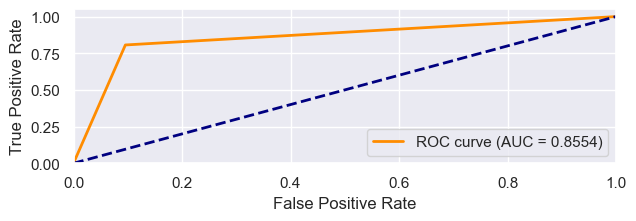

In [70]:
#plotting roc auc curve with GridSearchCV Cv Hyper Parameter Tuning

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred_rf_gs)

# Calculate AUC
roc_auc = roc_auc_score(y_test, test_pred_rf_gs)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### HyperParameter Tuning Using RandomizedSearch CV

In [71]:

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_leaf': [5, 10, 20, 50],
    'n_estimators': [200, 400, 600]
}


# Initialize RandomizedSearchCV
random_search_cv = RandomizedSearchCV(estimator=rf_model,
                                     param_distributions=param_dist,
                                     n_iter=10,  # Number of parameter settings that are sampled
                                     cv=3,
                                     n_jobs=-1,
                                     verbose=1,
                                     scoring="accuracy")

# Perform the randomized search
random_search_cv.fit(X_resampled, y_resampled)

# Print the best parameters found
print("Best Parameters:", random_search_cv.best_params_)

# Print the best score found
print("Best Score:", random_search_cv.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_leaf': 5, 'max_depth': None}
Best Score: 0.9645394769316301


In [72]:
rf_model = RandomForestClassifier(n_estimators=600,max_depth=None,min_samples_leaf=10,n_jobs=-1,random_state=42)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(min_samples_leaf=10, n_estimators=600, n_jobs=-1,
                       random_state=42)

In [73]:
# Training evaluation(GridSearchCv)
train_pred_rf_rs = rf_model.predict(X_resampled)
train_acc_rf_rs = accuracy_score(y_resampled, train_pred_rf_rs)

In [74]:
# testing evaluation(GridSearchCv)
test_pred_rf_rs = rf_model.predict(X_test)
test_acc_rf_rs = accuracy_score(y_test, test_pred_rf_rs)

In [75]:
print("\nRandom Forest:")
print(f"Training Accuracy: {train_acc_rf_rs:.4f}")
print(f"Testing Accuracy: {test_acc_rf_rs:.4f}")
print("\nClassification Report (Testing Set):\n", classification_report(y_test, test_pred_rf_rs))


Random Forest:
Training Accuracy: 0.9748
Testing Accuracy: 0.9500

Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      2907
           1       0.37      0.87      0.52        93

    accuracy                           0.95      3000
   macro avg       0.68      0.91      0.75      3000
weighted avg       0.98      0.95      0.96      3000



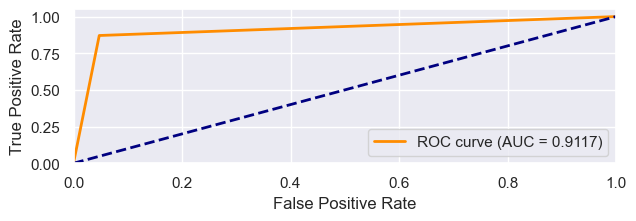

In [76]:
#plotting roc auc curve with RandomizedSearchCV Hyper Parameter Tuning

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred_rf_rs)

# Calculate AUC
roc_auc = roc_auc_score(y_test, test_pred_rf_rs)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# SVM

In [77]:
from sklearn.svm import SVC  #importing SVM model from the library

### Using RBF kernel

In [78]:
svm_model_rbf = SVC(kernel= 'rbf') # creating SVM model with RBF Kernel
svm_model_rbf.fit(X_resampled,y_resampled)

SVC()

In [79]:
# Training evaluation(RBF Kernel)
train_pred_svm_rbf =svm_model_rbf.predict(X_resampled)
train_acc_svm_rbf = accuracy_score(y_resampled, train_pred_svm_rbf)

In [80]:
# testing evaluation(RBF Kernel)
test_pred_svm_rbf = svm_model_rbf.predict(X_test)
test_acc_svm_rbf = accuracy_score(y_test, test_pred_svm_rbf)

In [81]:
print("\n SVM Rbf:")
print(f"Training Accuracy: {train_acc_svm_rbf:.4f}")
print(f"Testing Accuracy: {test_acc_svm_rbf:.4f}")
print("\nClassification Report (Testing Set):\n", classification_report(y_test, test_pred_svm_rbf))


 SVM Rbf:
Training Accuracy: 0.9380
Testing Accuracy: 0.9070

Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      2907
           1       0.22      0.81      0.35        93

    accuracy                           0.91      3000
   macro avg       0.61      0.86      0.65      3000
weighted avg       0.97      0.91      0.93      3000



### Using Linear Kernel

In [82]:
svm_model_lin = SVC(kernel= 'linear') # creating SVM model using Linear Kernel
svm_model_lin.fit(X_resampled,y_resampled)

SVC(kernel='linear')

In [83]:
# Training evaluation(Linear Kernel)
train_pred_svm_lin =svm_model_lin.predict(X_resampled)
train_acc_svm_lin = accuracy_score(y_resampled, train_pred_svm_lin)

In [84]:
# testing evaluation(Linear Kernel)
test_pred_svm_lin = svm_model_lin.predict(X_test)
test_acc_svm_lin = accuracy_score(y_test, test_pred_svm_lin)

In [85]:
print("\n SVM Linear:")
print(f"Training Accuracy: {train_acc_svm_lin:.4f}")
print(f"Testing Accuracy: {test_acc_svm_lin:.4f}")
print("\nClassification Report (Testing Set):\n", classification_report(y_test, test_pred_svm_lin))


 SVM Linear:
Training Accuracy: 0.7943
Testing Accuracy: 0.8073

Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.99      0.81      0.89      2907
           1       0.11      0.70      0.18        93

    accuracy                           0.81      3000
   macro avg       0.55      0.75      0.54      3000
weighted avg       0.96      0.81      0.87      3000



# Naive Bayes Classifier

In [86]:
from sklearn.naive_bayes import GaussianNB # importing NaiveBayes from the library
gnb = GaussianNB()
gnb.fit(X_resampled, y_resampled)

GaussianNB()

In [87]:
# Training evaluation(Naive Bayes)
train_pred_gnb =gnb.predict(X_resampled)
train_acc_gnb = accuracy_score(y_resampled, train_pred_gnb)

In [88]:
# testing evaluation(Naive Bayes)
test_pred_gnb = gnb.predict(X_test)
test_acc_gnb = accuracy_score(y_test, test_pred_gnb)

In [89]:
print("\n Naive Bayes Classifier")
print(f"Training Accuracy: {train_acc_gnb:.4f}")
print(f"Testing Accuracy: {test_acc_gnb:.4f}")
print("\nClassification Report (Testing Set):\n", classification_report(y_test, test_pred_gnb))


 Naive Bayes Classifier
Training Accuracy: 0.8277
Testing Accuracy: 0.8177

Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       0.99      0.82      0.90      2907
           1       0.12      0.74      0.20        93

    accuracy                           0.82      3000
   macro avg       0.55      0.78      0.55      3000
weighted avg       0.96      0.82      0.88      3000



# Gradient Boost

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_resampled,y_resampled)

GradientBoostingClassifier(random_state=42)

In [92]:
# Training evaluation(Gradient Boost)
train_pred_gb =gb_classifier.predict(X_resampled)
train_acc_gb = accuracy_score(y_resampled, train_pred_gb)

In [93]:
# testing evaluation(Gradient Boost
test_pred_gb = gb_classifier.predict(X_test)
test_acc_gb = accuracy_score(y_test, test_pred_gb)

In [94]:
print("\n Gradient Boost Classifier")
print(f"Training Accuracy: {train_acc_gb:.4f}")
print(f"Testing Accuracy: {test_acc_gb:.4f}")
print("\nClassification Report (Testing Set):\n", classification_report(y_test, test_pred_gb))


 Gradient Boost Classifier
Training Accuracy: 0.9454
Testing Accuracy: 0.9320

Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       1.00      0.93      0.96      2907
           1       0.30      0.89      0.45        93

    accuracy                           0.93      3000
   macro avg       0.65      0.91      0.71      3000
weighted avg       0.97      0.93      0.95      3000

